Tensorboard is a debugging tool used to understand and debug tensorflow models. It can show data flow and graphs, accuracy and loss of model as it progresses

In [1]:
import tensorflow as tf

##Import MNIST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
##Model Parameters
learn_rate = 0.001
training_epochs = 40
batch_size = 100
log_paths = "/tmp/tensorflow_logs/mnist"

In [3]:
##Graph Input

##mnist image of the shape = 28*28 = 784
x = tf.placeholder(tf.float32, [None, 784], name = "ipdata")
##classes are the 10 labels
y = tf.placeholder(tf.float32, [None, 10], name = "iplabel")

##model weights and variables
w = tf.Variable(tf.zeros([784, 10]), name = "weights")
b = tf.Variable(tf.zeros([10]), name = "biases")

In [4]:
##construct model with scopes for easier implementation of tensorboard

with tf.name_scope("model"):
    pred = tf.nn.softmax(tf.matmul(x, w) + b)

with tf.name_scope("loss"):
    loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices = 1))
    
with tf.name_scope("gradientdescent"):
    optimizer = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)
    
with tf.name_scope("accuracy"):
    accuracy = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(accuracy, tf.float32))

In [5]:
##Intialization of all variables
init = tf.global_variables_initializer()

##Summary to monitor cost and accuracy
tf.summary.scalar("Loss", loss)
tf.summary.scalar("Accuarcy", accuracy)
summary_final = tf.summary.merge_all()

In [8]:
#Start session

with tf.Session() as sess:
    sess.run(init)
    #write logs to tensorboard
    summary_writer = tf.summary.FileWriter(log_paths, graph = tf.get_default_graph())
    #train
    for epoch in range(training_epochs):
        cost = 0.0
        batches = range(int(mnist.train.num_examples/batch_size))
        
        for batch in batches:
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            opt, c, summary = sess.run([optimizer, loss, summary_final], 
                                       feed_dict = {x: batch_x, y:batch_y})
            #write logs
            summary_writer.add_summary(summary, epoch*len(batches)+batch)
            cost +=c/len(batches)
        print "Epoch:", epoch+1, "Cost:", cost
    print "Training finished"
        
    print "Accuracy:", accuracy.eval({x:mnist.test.images, y:mnist.test.labels})
    
    print "Run the command line:\n" \
          "--> tensorboard --logdir=/tmp/tensorflow_logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser"

Epoch: 1 Cost: 2.04731172323
Epoch: 2 Cost: 1.65790112474
Epoch: 3 Cost: 1.39231249332
Epoch: 4 Cost: 1.21862791885
Epoch: 5 Cost: 1.09346113855
Epoch: 6 Cost: 0.995027006214
Epoch: 7 Cost: 0.931451279575
Epoch: 8 Cost: 0.872292259281
Epoch: 9 Cost: 0.823110918348
Epoch: 10 Cost: 0.789441168417
Epoch: 11 Cost: 0.754484931664
Epoch: 12 Cost: 0.728663849506
Epoch: 13 Cost: 0.705064713088
Epoch: 14 Cost: 0.681577837467
Epoch: 15 Cost: 0.665560370033
Epoch: 16 Cost: 0.652228123491
Epoch: 17 Cost: 0.634829136025
Epoch: 18 Cost: 0.61405998165
Epoch: 19 Cost: 0.611885560426
Epoch: 20 Cost: 0.597554414652
Epoch: 21 Cost: 0.589698325721
Epoch: 22 Cost: 0.577558114474
Epoch: 23 Cost: 0.567737847729
Epoch: 24 Cost: 0.561123084751
Epoch: 25 Cost: 0.55391550904
Epoch: 26 Cost: 0.550275521874
Epoch: 27 Cost: 0.538777398467
Epoch: 28 Cost: 0.532130005793
Epoch: 29 Cost: 0.530711324974
Epoch: 30 Cost: 0.519702508883
Epoch: 31 Cost: 0.51877383904
Epoch: 32 Cost: 0.51448729423
Epoch: 33 Cost: 0.50552246

###### Here is the Loss and Accuracy:

In [9]:
from IPython.display import Image

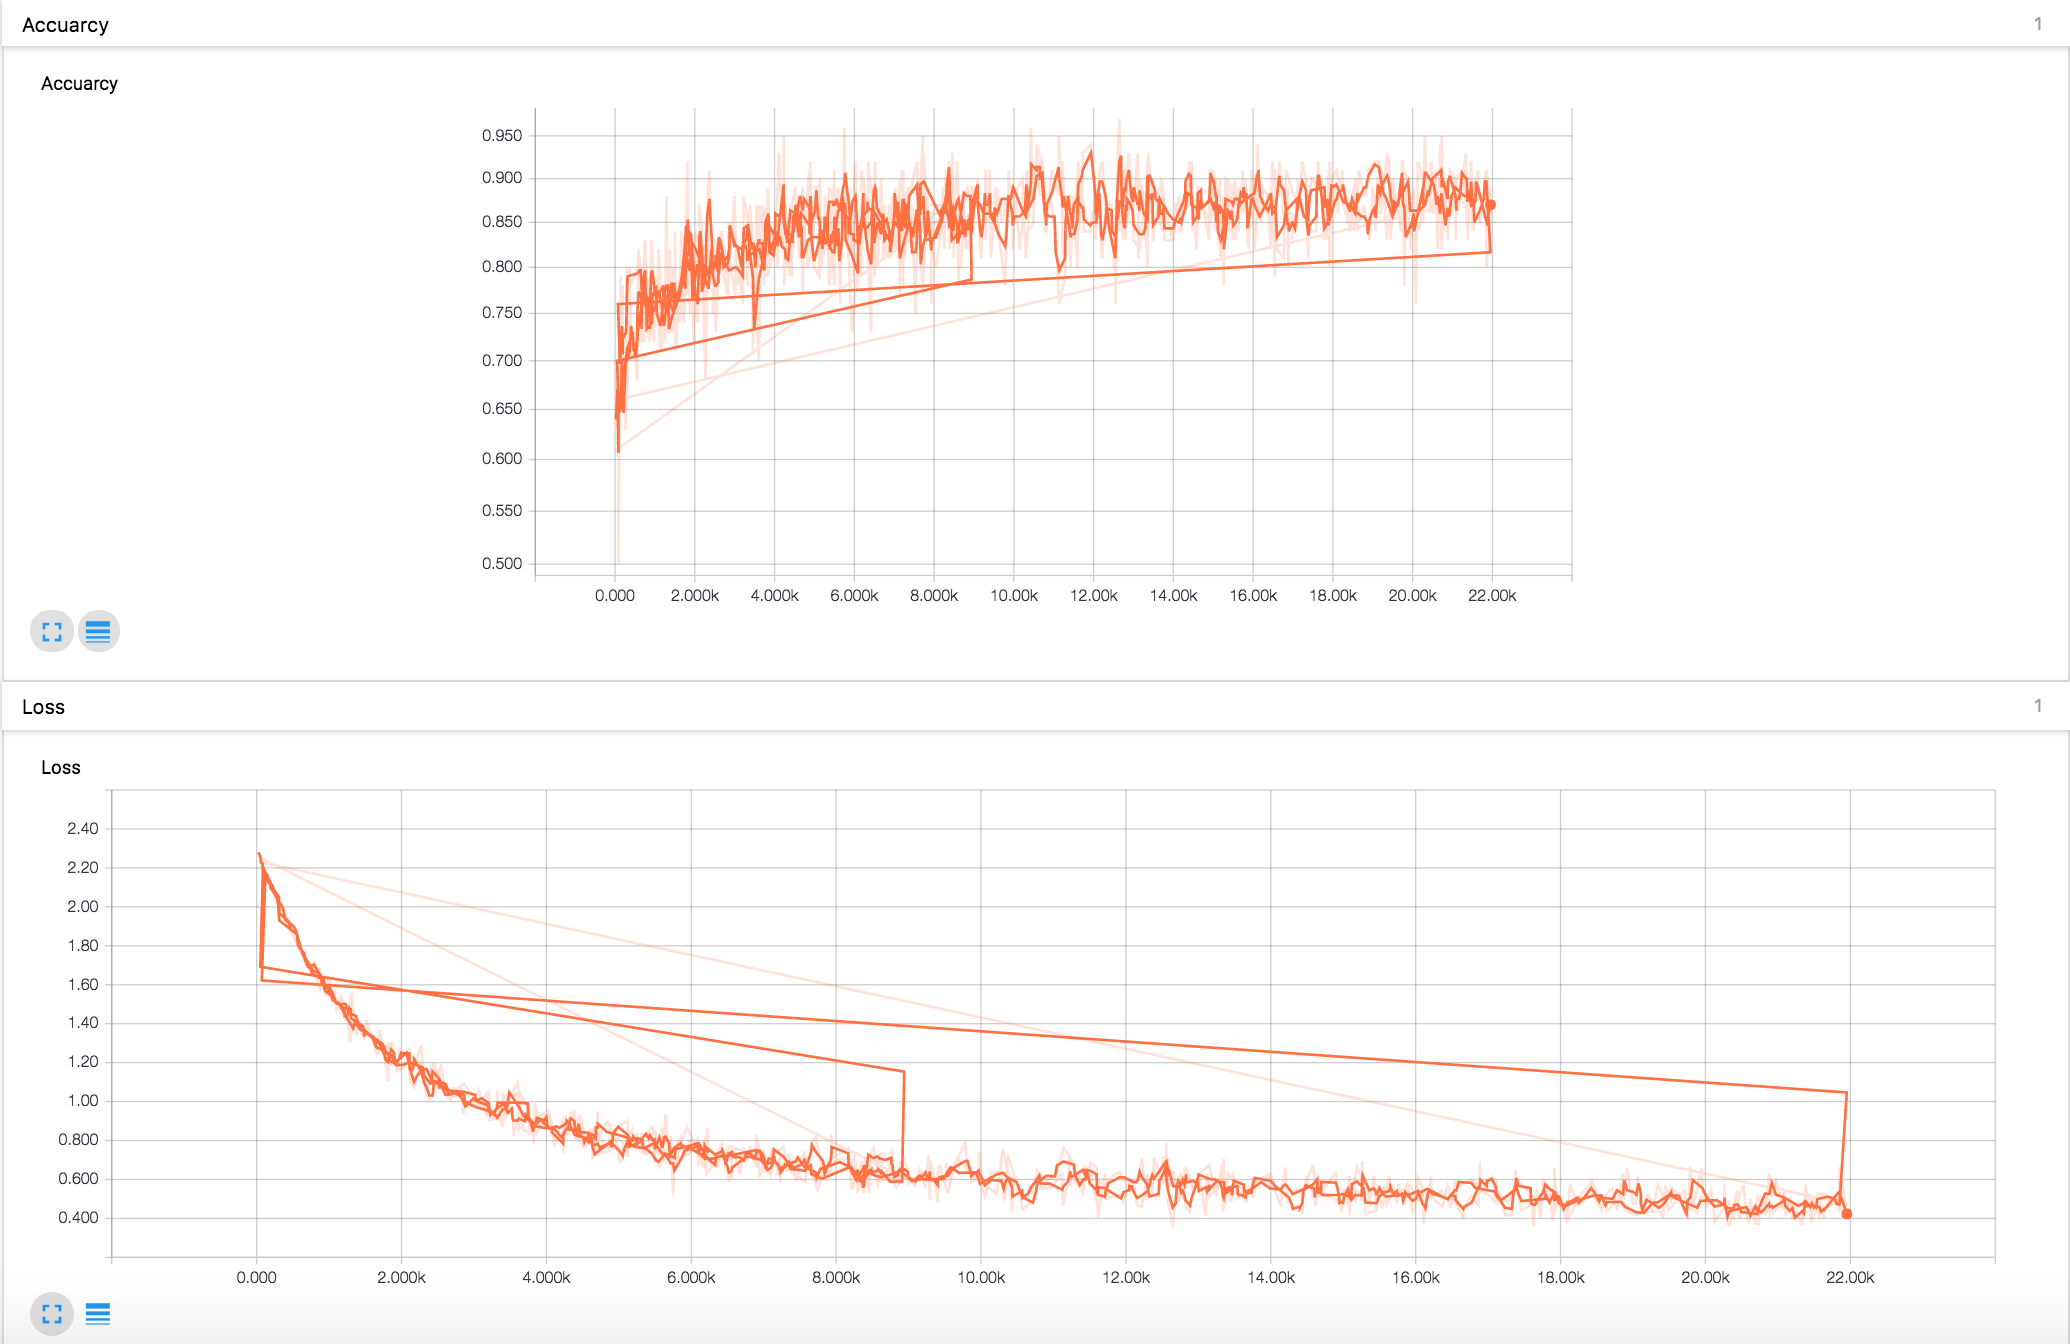

In [17]:
Image(filename="/Users/gaurikatyagi/Documents/deep_learning/deep_learning_tensorflow/acc_loss.png")

###### Graphical flow of Model

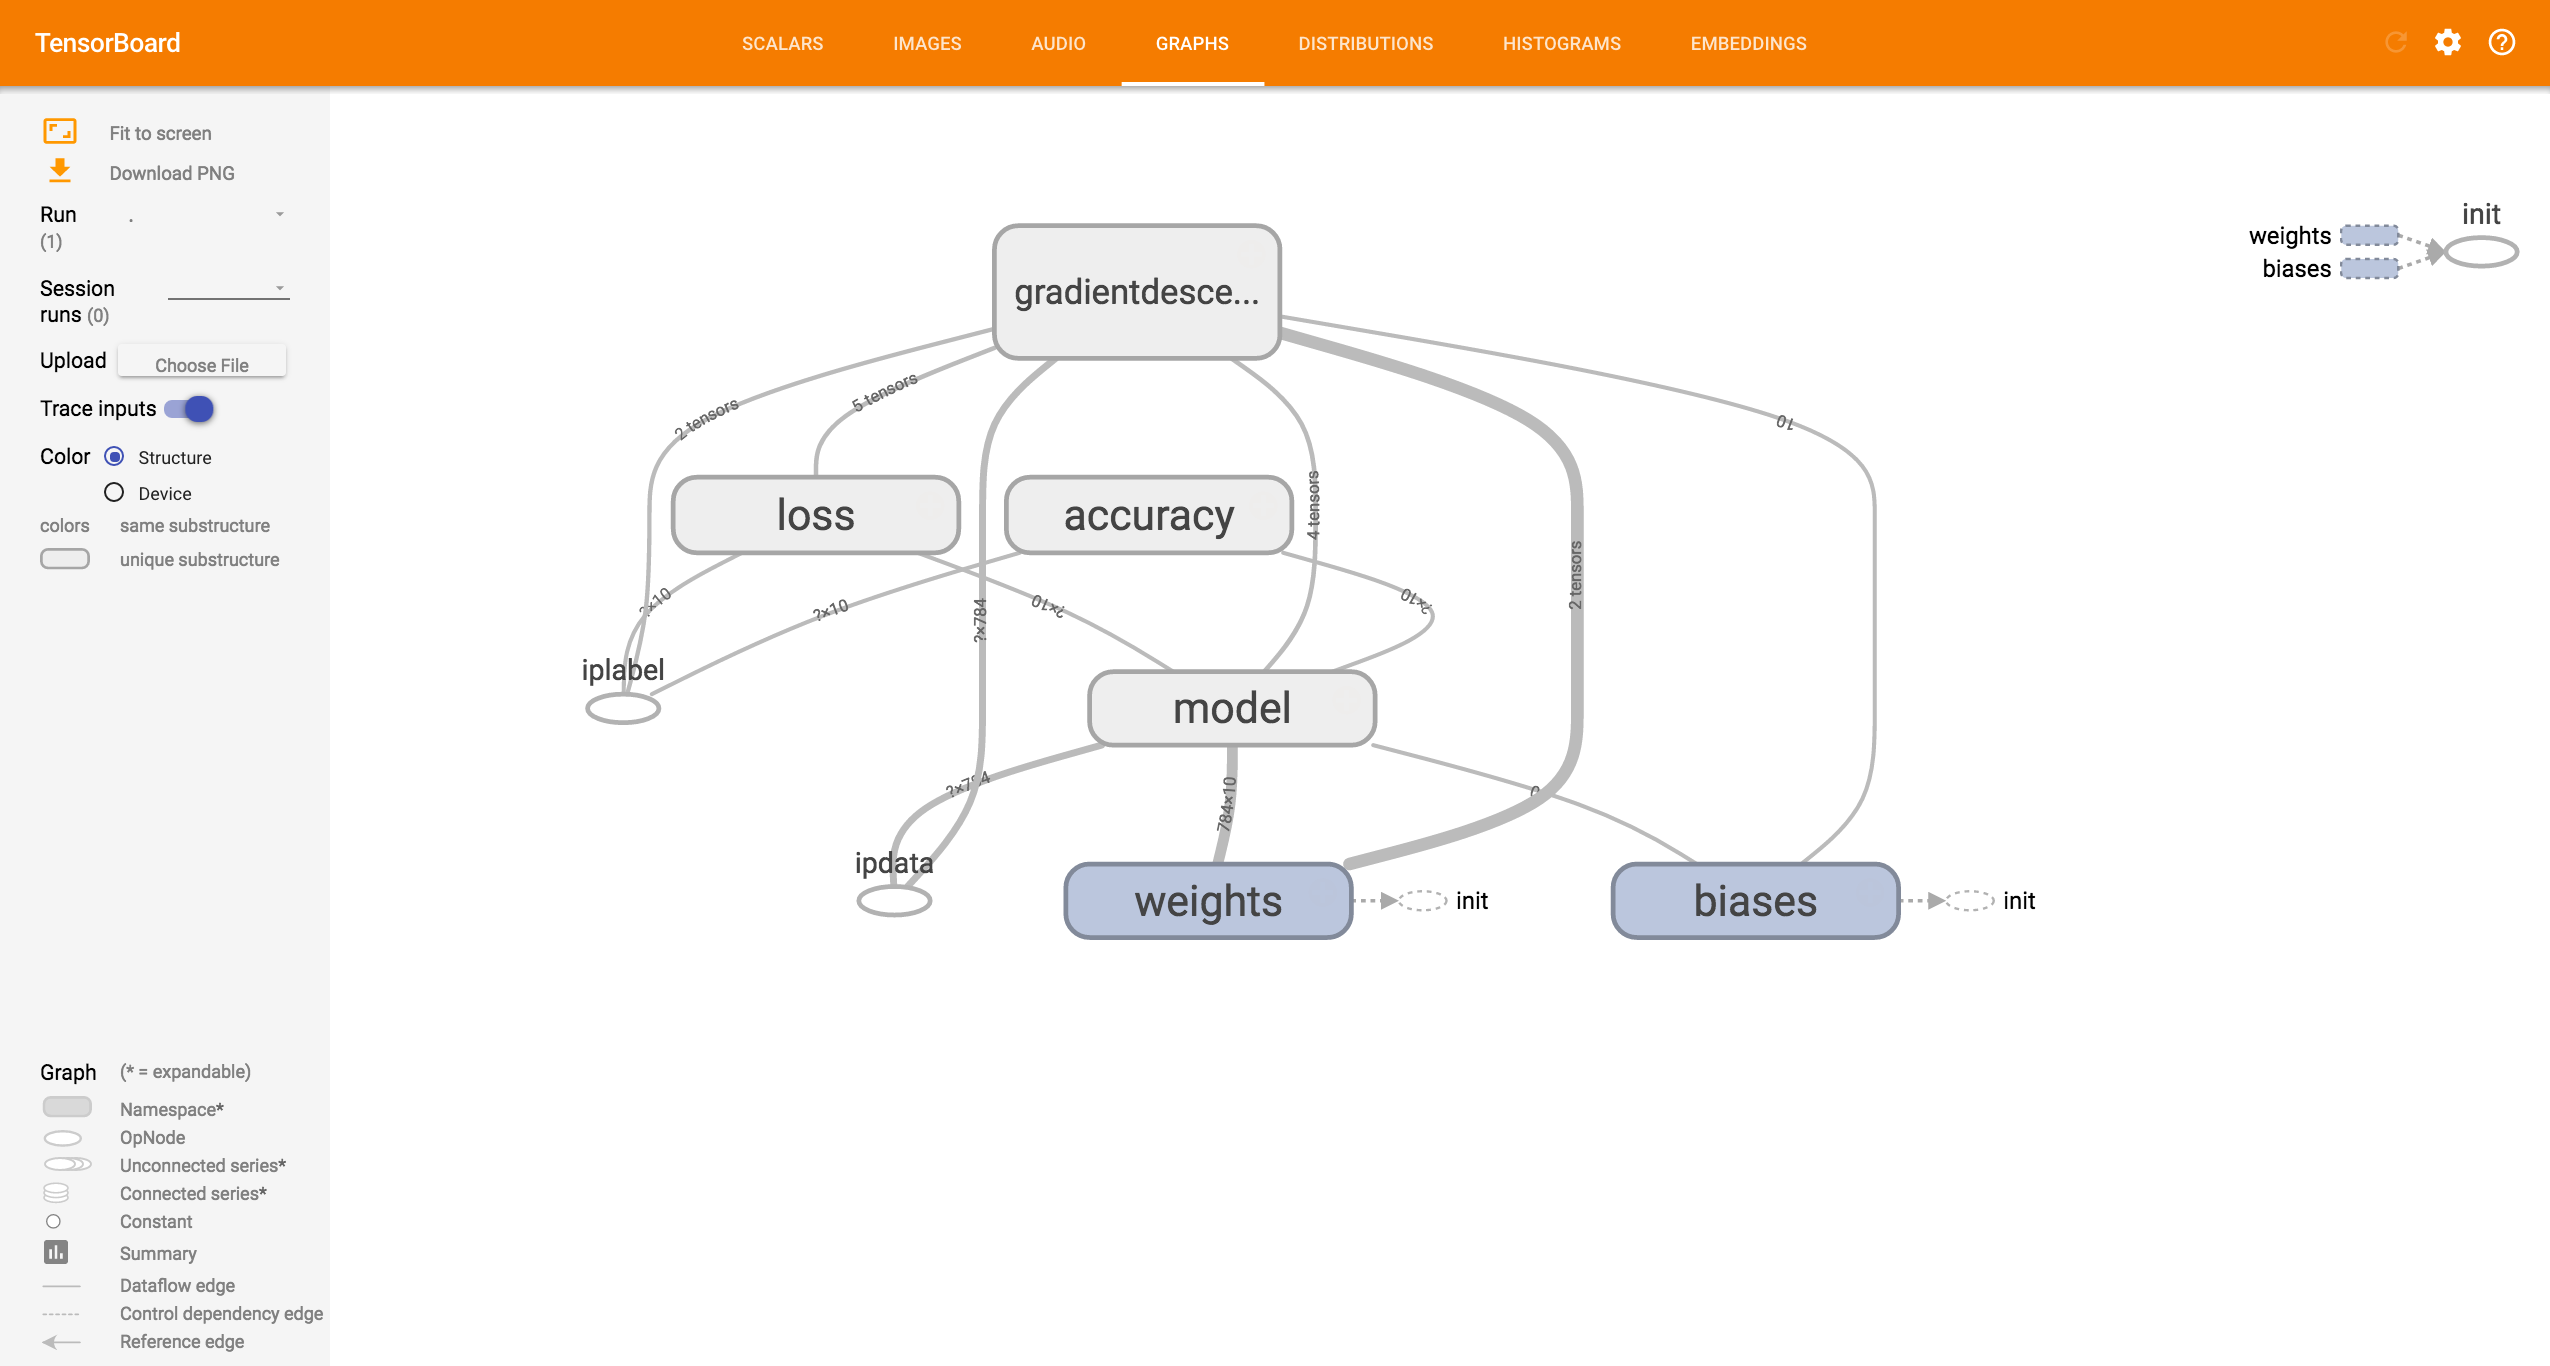

In [18]:
Image(filename="/Users/gaurikatyagi/Documents/deep_learning/deep_learning_tensorflow/graph.png")